# Dynex SDK - nBit Adder Native Gate Circuit Example

First we import the required packages:

In [1]:
import dynex
from dynex import dynex_circuit
from pennylane import numpy as np
import pennylane as qml

We define our circuit:

In [2]:
params = [25678 , 15000] # two numbers to add

def Nqubits(a, b):
    mxVal = a + b
    return mxVal.bit_length()

wires = Nqubits(*params)

def Kfourier(k, wires):
    for j in range(len(wires)):
        qml.RZ(k * np.pi / (2**j), wires=wires[j])

def FullAdder(params, state=True):
    a, b = params
    wires = Nqubits(a, b)
    qml.BasisEmbedding(a, wires=range(wires))
    qml.QFT(wires=range(wires))
    Kfourier(b, range(wires))
    qml.adjoint(qml.QFT)(wires=range(wires))
    if state:
        return qml.state()
    else:
        return qml.sample()

We draw the circuit:

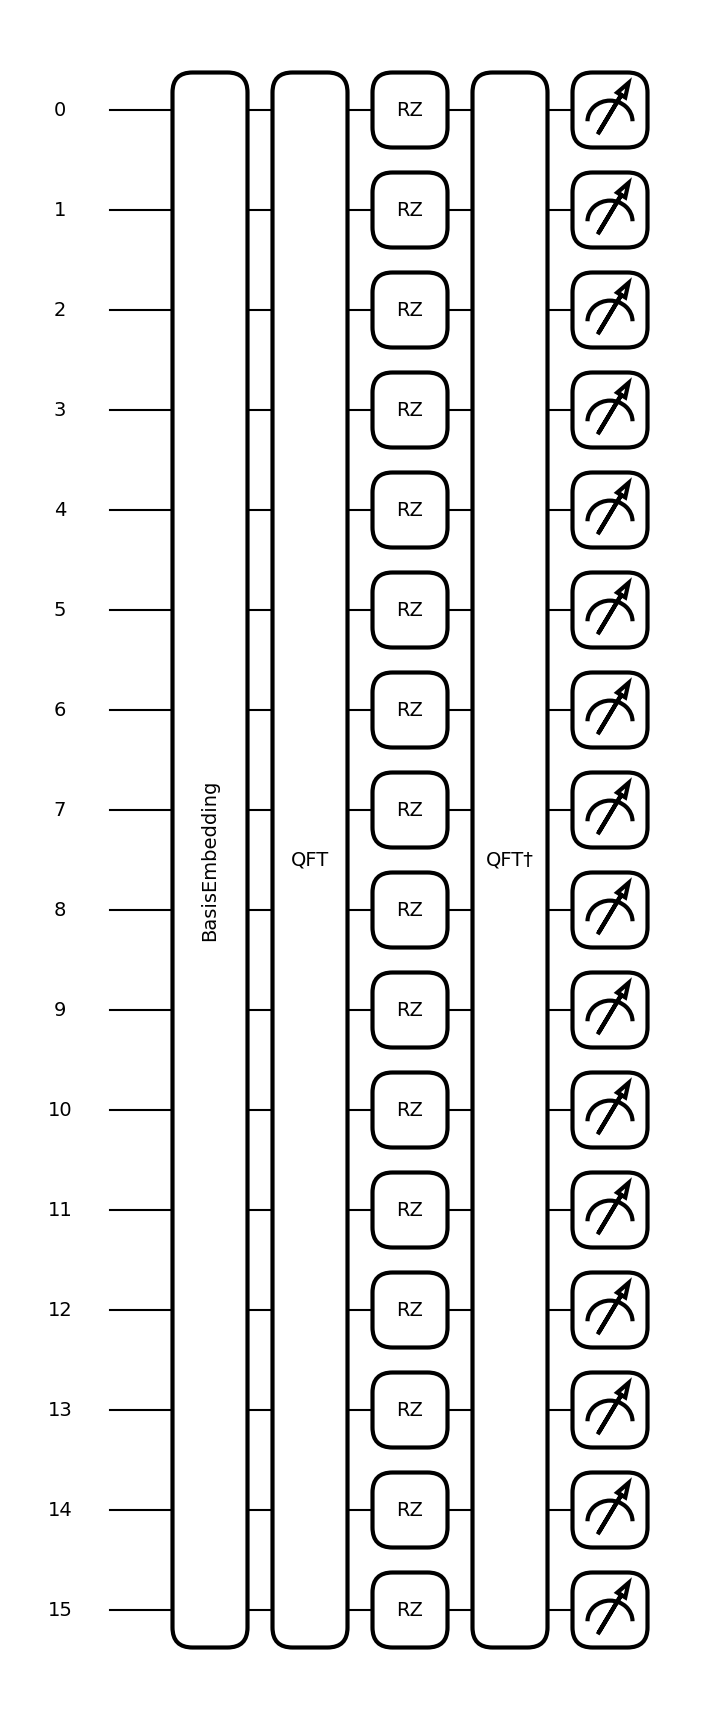

In [3]:
# draw circuit:
_ = qml.draw_mpl(FullAdder, style="black_white")(params)

We execute and measure the circuit on the Dynex platform:

In [4]:
# Execute the circuit on Dynex:
measure = dynex_circuit.execute(FullAdder, params, wires, mainnet=True, method='measure',
                                num_reads=10000, integration_steps=1024, is_cluster=True, cluster_type=0)
print('Mesaure:',measure)

╭────────────┬──────────┬─────────────────┬─────────────┬───────────┬────────────────┬────────────┬─────────┬────────────────╮
│   DYNEXJOB │   QUBITS │   QUANTUM GATES │   BLOCK FEE │   ELAPSED │   WORKERS READ │   CIRCUITS │   STEPS │   GROUND STATE │
├────────────┼──────────┼─────────────────┼─────────────┼───────────┼────────────────┼────────────┼─────────┼────────────────┤
│     201435 │      198 │            1010 │        0.00 │      0.91 │              3 │      30000 │    1024 │         373.16 │
╰────────────┴──────────┴─────────────────┴─────────────┴───────────┴────────────────┴────────────┴─────────┴────────────────╯
╭────────────┬─────────────────┬────────────┬───────┬──────────┬───────────────┬─────────────────────────────┬───────────┬──────────╮
│     WORKER │         VERSION │   CIRCUITS │   LOC │   ENERGY │       RUNTIME │                 LAST UPDATE │     STEPS │   STATUS │
├────────────┼─────────────────┼────────────┼───────┼──────────┼───────────────┼─────────────────

In [5]:
bitStr = ''.join(map(str, measure.astype(int)))
dynexResult = int(bitStr, 2)
print("Dynex Result:", dynexResult)
print("Expected Result:", sum(params))
isValidDynex = dynexResult == sum(params)
print("Is Dynex Result Valid?", isValidDynex)

Dynex Result: 40678
Expected Result: 40678
Is Dynex Result Valid? True
